In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy.polynomial.polynomial import polyfit
import statsmodels.formula.api as sm

In [103]:
df0 = pd.read_csv("jplus_sspp.txt",sep=' ')
df0

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,0355-51788-0064,260.550224,56.905830,6076,4.213,-1.151,F5,17.526304,17.207840,17.092297,16.758161,16.709351,16.497959,16.416205,16.138050,16.092394,15.971630,15.972558,15.942645
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
3,0357-51813-0550,261.044995,56.208497,5646,3.337,-2.025,F5,18.129843,17.700920,17.620277,17.401062,17.290638,17.016707,16.900097,16.544029,16.492199,16.293610,16.253666,16.225510
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
6,0358-51818-0277,262.237362,56.366903,5721,4.479,-1.217,G2,17.471108,17.288258,17.161781,16.844524,16.734047,16.398077,16.264748,15.911975,15.878081,15.702483,15.685789,15.634157
7,0358-51818-0518,263.326016,57.008204,6048,4.040,-1.784,F5,19.284329,18.835606,18.813152,18.524963,18.693676,18.337357,18.269838,17.958914,17.886160,17.780407,17.740013,17.762138
8,0358-51818-0522,264.092504,57.595325,6404,4.225,-1.665,F5,19.019474,18.665943,18.536802,18.377125,18.193298,18.045948,17.902924,17.715183,17.698460,17.632582,17.557308,17.597729
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750


In [104]:
df1=df0[df0.TEFF>7500]
df1

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750
10,0358-51818-0555,264.506016,56.763370,7520,4.089,-1.113,A0,19.402348,18.737839,18.453316,18.196552,18.245270,18.057793,18.007175,18.026157,18.103848,18.115112,18.170582,18.111418
11,0358-51818-0584,264.708855,57.026715,7779,4.026,-1.211,A0,17.947752,17.322285,16.955818,16.784756,16.709492,16.719286,16.684387,16.676348,16.743443,16.719650,16.762789,16.744406
12,0367-51997-0605,261.364546,56.563424,7969,4.390,-1.337,A0,19.186386,18.780720,18.335800,17.916233,17.966175,17.914108,17.929800,18.006424,18.050779,18.041815,18.167316,18.161669
15,0431-51877-0414,113.938322,38.840945,8222,4.294,-1.154,A0,18.739458,18.199085,17.845818,17.489750,17.539259,17.419884,17.486351,17.492248,17.574257,17.573921,17.572670,17.647156
16,0432-51884-0187,115.168512,39.870432,7658,3.110,-1.511,A0,17.000877,16.193214,15.867228,15.629083,15.655346,15.595911,15.558558,15.534168,15.612087,15.567967,15.589592,15.619976


In [105]:
#Colors Indexes:
(uJAVA_J0378) = df1.uJAVA - df1.J0378
(uJAVA_J0410) = df1.uJAVA - df1.J0410
(uJAVA_J0660) = df1.uJAVA - df1.J0660
(uJAVA_J0861) = df1.uJAVA - df1.J0861
(J0378_J0410) = df1.J0378 - df1.J0410
(J0378_J0660) = df1.J0378 - df1.J0660
(J0378_J0861) = df1.J0378 - df1.J0861
(J0410_J0660) = df1.J0410 - df1.J0660
(J0410_J0861) = df1.J0410 - df1.J0861
(J0660_J0861) = df1.J0660 - df1.J0861

In [152]:
df2 = pd.DataFrame ({"LOGG": df1.LOGG, "uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861)})
df2

,LOGG,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861
1,3.306,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473
2,4.501,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786
4,3.411,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638
5,3.493,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587
9,3.551,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413
10,4.089,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734
11,4.026,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346
12,4.390,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537
15,4.294,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587
16,3.110,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495


In [153]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.uJAVA_J0410", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.535287
df2.uJAVA_J0378   -2.533247
df2.uJAVA_J0410    0.792159
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     322.1
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.15e-84
Time:                        03:06:09   Log-Likelihood:                -101.80
No. Observations:                 411   AIC:                             209.6
Df Residuals:                     408   BIC:                             221.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -7.864673151887919e-07 + 1.0000001990234204 *x
0.6122684497958295


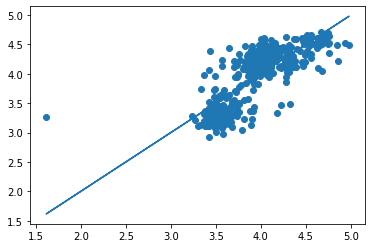

In [203]:
LOGGP1 = -2.533247*df2.uJAVA_J0378+0.7921598*df2.uJAVA_J0410+4.535287
plt.scatter(LOGGP1,df2.LOGG)
b,m = polyfit (LOGGP1,df2.LOGG,1)
np.corrcoef(LOGGP1,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP1,b+m*LOGGP1)
a=np.corrcoef(LOGGP1,df2.LOGG)[0,1]
print(a**2)

In [154]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.uJAVA_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.730781
df2.uJAVA_J0378   -2.379205
df2.uJAVA_J0660    0.616400
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     411.9
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.26e-98
Time:                        03:06:09   Log-Likelihood:                -69.425
No. Observations:                 411   AIC:                             144.8
Df Residuals:                     408   BIC:                             156.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 2.5640354358955175e-07 + 0.9999998407033205 *x
0.6687885997224403


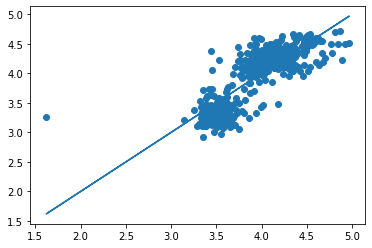

In [206]:
LOGGP2 = -2.379205*df2.uJAVA_J0378+0.616400*df2.uJAVA_J0660+4.730781
plt.scatter(LOGGP2,df2.LOGG)
b,m = polyfit (LOGGP2,df2.LOGG,1)
np.corrcoef(LOGGP2,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP2,b+m*LOGGP2)
a=np.corrcoef(LOGGP2,df2.LOGG)[0,1]
print(a**2)

In [155]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.uJAVA_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.766687
df2.uJAVA_J0378   -2.066860
df2.uJAVA_J0861    0.418915
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     367.2
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           6.02e-92
Time:                        03:06:10   Log-Likelihood:                -84.914
No. Observations:                 411   AIC:                             175.8
Df Residuals:                     408   BIC:                             187.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.4974625384058295e-06 + 1.0000002462334026 *x
0.6428586922081152


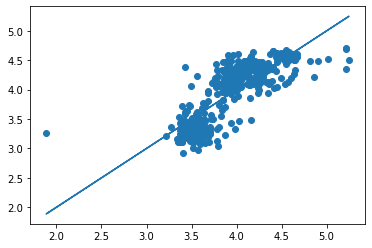

In [207]:
LOGGP3 = -2.066860*df2.uJAVA_J0378+0.418915*df2.uJAVA_J0861+4.766687
plt.scatter(LOGGP3,df2.LOGG)
b,m = polyfit (LOGGP3,df2.LOGG,1)
np.corrcoef(LOGGP3,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP3,b+m*LOGGP3)
a=np.corrcoef(LOGGP3,df2.LOGG)[0,1]
print(a**2)

In [156]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.J0378_J0410", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.535287
df2.uJAVA_J0378   -1.741087
df2.J0378_J0410    0.792159
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     322.1
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.15e-84
Time:                        03:06:10   Log-Likelihood:                -101.80
No. Observations:                 411   AIC:                             209.6
Df Residuals:                     408   BIC:                             221.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -6.556251984613761e-07 + 1.0000002459767936 *x
0.6122684497958636


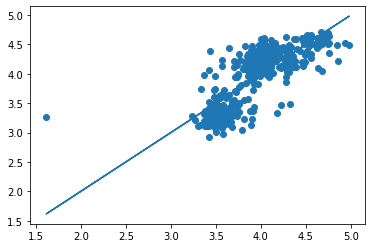

In [208]:
LOGGP4 = -1.741087*df2.uJAVA_J0378+0.792159*df2.J0378_J0410+4.535287
plt.scatter(LOGGP4,df2.LOGG)
b,m = polyfit (LOGGP4,df2.LOGG,1)
np.corrcoef(LOGGP4,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP4,b+m*LOGGP4)
a=np.corrcoef(LOGGP4,df2.LOGG)[0,1]
print(a**2)

In [157]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.J0378_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.730781
df2.uJAVA_J0378   -1.762805
df2.J0378_J0660    0.616400
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     411.9
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.26e-98
Time:                        03:06:11   Log-Likelihood:                -69.425
No. Observations:                 411   AIC:                             144.8
Df Residuals:                     408   BIC:                             156.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 2.5640354358955175e-07 + 0.9999998407033205 *x
0.6687885997224403


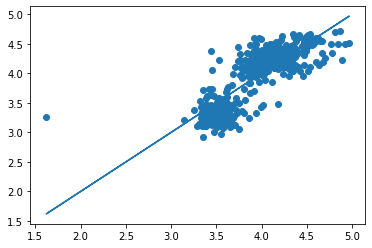

In [209]:
LOGGP5 = -1.762805*df2.uJAVA_J0378+0.616400*df2.J0378_J0660+4.730781
plt.scatter(LOGGP5,df2.LOGG)
b,m = polyfit (LOGGP5,df2.LOGG,1)
np.corrcoef(LOGGP5,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP5,b+m*LOGGP5)
a=np.corrcoef(LOGGP5,df2.LOGG)[0,1]
print(a**2)

In [158]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.J0378_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.766687
df2.uJAVA_J0378   -1.647945
df2.J0378_J0861    0.418915
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     367.2
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           6.02e-92
Time:                        03:06:11   Log-Likelihood:                -84.914
No. Observations:                 411   AIC:                             175.8
Df Residuals:                     408   BIC:                             187.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.4974625405087387e-06 + 1.0000002462334032 *x
0.6428586922081148


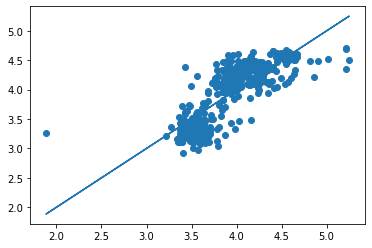

In [210]:
LOGGP6 = -1.647945*df2.uJAVA_J0378+0.418915*df2.J0378_J0861+4.766687
plt.scatter(LOGGP6,df2.LOGG)
b,m = polyfit (LOGGP6,df2.LOGG,1)
np.corrcoef(LOGGP6,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP6,b+m*LOGGP6)
a=np.corrcoef(LOGGP6,df2.LOGG)[0,1]
print(a**2)

In [159]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.980585
df2.uJAVA_J0378   -1.595709
df2.J0410_J0660    0.723177
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     376.0
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.62e-93
Time:                        03:06:12   Log-Likelihood:                -81.758
No. Observations:                 411   AIC:                             169.5
Df Residuals:                     408   BIC:                             181.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -2.9362315132465126e-07 + 1.0000000004174698 *x
0.648303175941508


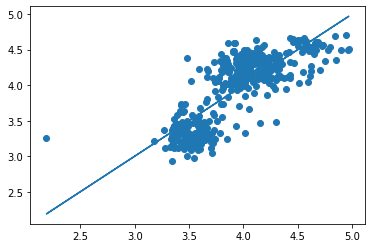

In [211]:
LOGGP7 = -1.595709*df2.uJAVA_J0378+0.723177*df2.J0410_J0660+4.980585
plt.scatter(LOGGP7,df2.LOGG)
b,m = polyfit (LOGGP7,df2.LOGG,1)
np.corrcoef(LOGGP7,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP7,b+m*LOGGP7)
a=np.corrcoef(LOGGP7,df2.LOGG)[0,1]
print(a**2)

In [160]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.920819
df2.uJAVA_J0378   -1.525753
df2.J0410_J0861    0.417801
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     334.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.06e-86
Time:                        03:06:12   Log-Likelihood:                -97.078
No. Observations:                 411   AIC:                             200.2
Df Residuals:                     408   BIC:                             212.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 4.7490945206484305e-07 + 0.9999998090153673 *x
0.6210807402718547


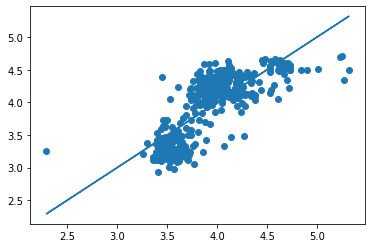

In [212]:
LOGGP8 = -1.525753*df2.uJAVA_J0378+0.417801*df2.J0410_J0861+4.920819
plt.scatter(LOGGP8,df2.LOGG)
b,m = polyfit (LOGGP8,df2.LOGG,1)
np.corrcoef(LOGGP8,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP8,b+m*LOGGP8)
a=np.corrcoef(LOGGP8,df2.LOGG)[0,1]
print(a**2)

In [161]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0378 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.829597
df2.uJAVA_J0378   -1.494011
df2.J0660_J0861    0.198856
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     274.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.70e-76
Time:                        03:06:13   Log-Likelihood:                -121.22
No. Observations:                 411   AIC:                             248.4
Df Residuals:                     408   BIC:                             260.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.4429959651964433e-06 + 1.0000002512506398 *x
0.573849532407818


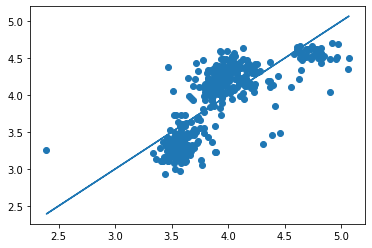

In [213]:
LOGGP9 = -1.494011*df2.uJAVA_J0378+0.198856*df2.J0660_J0861+4.829597
plt.scatter(LOGGP9,df2.LOGG)
b,m = polyfit (LOGGP9,df2.LOGG,1)
np.corrcoef(LOGGP9,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP9,b+m*LOGGP9)
a=np.corrcoef(LOGGP9,df2.LOGG)[0,1]
print(a**2)

In [162]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.uJAVA_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.185329
df2.uJAVA_J0410   -1.817794
df2.uJAVA_J0660    0.811965
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.60e-60
Time:                        03:06:13   Log-Likelihood:                -158.29
No. Observations:                 411   AIC:                             322.6
Df Residuals:                     408   BIC:                             334.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -3.0631071960396316e-06 + 1.0000006160710926 *x
0.4895918299175302


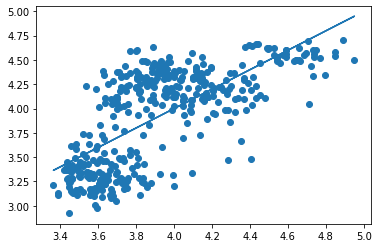

In [214]:
LOGGP10 = -1.817794*df2.uJAVA_J0410+0.811965*df2.uJAVA_J0660+5.185329
plt.scatter(LOGGP10,df2.LOGG)
b,m = polyfit (LOGGP10,df2.LOGG,1)
np.corrcoef(LOGGP10,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP10,b+m*LOGGP10)
a=np.corrcoef(LOGGP10,df2.LOGG)[0,1]
print(a**2)

In [163]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.uJAVA_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.104792
df2.uJAVA_J0410   -1.449907
df2.uJAVA_J0861    0.503020
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.13e-56
Time:                        03:06:14   Log-Likelihood:                -167.37
No. Observations:                 411   AIC:                             340.7
Df Residuals:                     408   BIC:                             352.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 2.729594128043001e-07 + 0.9999998691332374 *x
0.46654468584091385


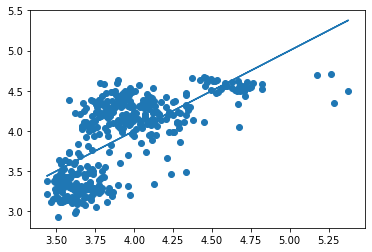

In [215]:
LOGGP11 = -1.449907*df2.uJAVA_J0410+0.503020*df2.uJAVA_J0861+5.104792
plt.scatter(LOGGP11,df2.LOGG)
b,m = polyfit (LOGGP11,df2.LOGG,1)
np.corrcoef(LOGGP11,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP11,b+m*LOGGP11)
a=np.corrcoef(LOGGP11,df2.LOGG)[0,1]
print(a**2)

In [164]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.J0378_J0410", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.535287
df2.uJAVA_J0410   -1.741087
df2.J0378_J0410    2.533247
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     322.1
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.15e-84
Time:                        03:06:14   Log-Likelihood:                -101.80
No. Observations:                 411   AIC:                             209.6
Df Residuals:                     408   BIC:                             221.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.5749627791564548e-06 + 1.0000003417694705 *x
0.6122684497957915


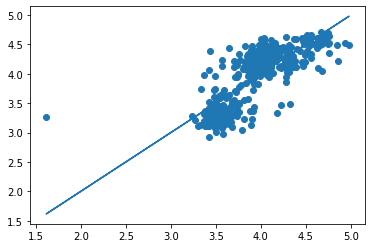

In [216]:
LOGGP12 = -1.741087*df2.uJAVA_J0410+2.533247*df2.J0378_J0410+4.535287
plt.scatter(LOGGP12,df2.LOGG)
b,m = polyfit (LOGGP12,df2.LOGG,1)
np.corrcoef(LOGGP12,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP12,b+m*LOGGP12)
a=np.corrcoef(LOGGP12,df2.LOGG)[0,1]
print(a**2)

In [165]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.J0378_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.075166
df2.uJAVA_J0410   -1.367438
df2.J0378_J0660    1.017231
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     306.8
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           4.86e-82
Time:                        03:06:14   Log-Likelihood:                -107.89
No. Observations:                 411   AIC:                             221.8
Df Residuals:                     408   BIC:                             233.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -4.5421797757266327e-07 + 1.0000001197530277 *x
0.6006039191268906


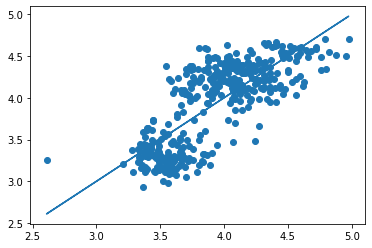

In [217]:
LOGGP13 = -1.367438*df2.uJAVA_J0410+1.017231*df2.J0378_J0660+5.075166
plt.scatter(LOGGP13,df2.LOGG)
b,m = polyfit (LOGGP13,df2.LOGG,1)
np.corrcoef(LOGGP13,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP13,b+m*LOGGP13)
a=np.corrcoef(LOGGP13,df2.LOGG)[0,1]
print(a**2)

In [166]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.J0378_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.040590
df2.uJAVA_J0410   -1.172732
df2.J0378_J0861    0.646994
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     241.8
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           5.50e-70
Time:                        03:06:15   Log-Likelihood:                -135.85
No. Observations:                 411   AIC:                             277.7
Df Residuals:                     408   BIC:                             289.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -3.075224919672127e-07 + 1.000000063290651 *x
0.5423920664884867


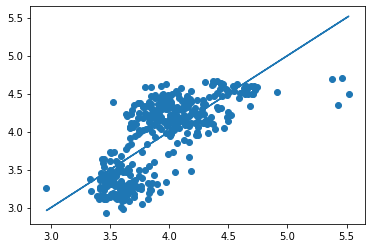

In [218]:
LOGGP14 = -1.172732*df2.uJAVA_J0410+0.646994*df2.J0378_J0861+5.040590
plt.scatter(LOGGP14,df2.LOGG)
b,m = polyfit (LOGGP14,df2.LOGG,1)
np.corrcoef(LOGGP14,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP14,b+m*LOGGP14)
a=np.corrcoef(LOGGP14,df2.LOGG)[0,1]
print(a**2)

In [167]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.185329
df2.uJAVA_J0410   -1.005830
df2.J0410_J0660    0.811965
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.60e-60
Time:                        03:06:15   Log-Likelihood:                -158.29
No. Observations:                 411   AIC:                             322.6
Df Residuals:                     408   BIC:                             334.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 1.5801853361968334e-06 + 0.9999997235021452 *x
0.4895918299176804


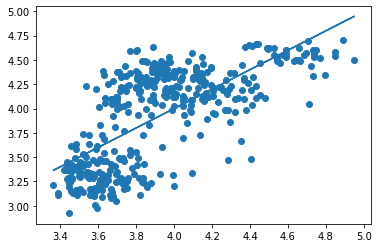

In [219]:
LOGGP15 = -1.005830*df2.uJAVA_J0410+0.811965*df2.J0410_J0660+5.185329
plt.scatter(LOGGP15,df2.LOGG)
b,m = polyfit (LOGGP15,df2.LOGG,1)
np.corrcoef(LOGGP15,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP15,b+m*LOGGP15)
a=np.corrcoef(LOGGP15,df2.LOGG)[0,1]
print(a**2)

In [168]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.104792
df2.uJAVA_J0410   -0.946887
df2.J0410_J0861    0.503020
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.13e-56
Time:                        03:06:16   Log-Likelihood:                -167.37
No. Observations:                 411   AIC:                             340.7
Df Residuals:                     408   BIC:                             352.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 2.729594128043001e-07 + 0.9999998691332374 *x
0.46654468584091385


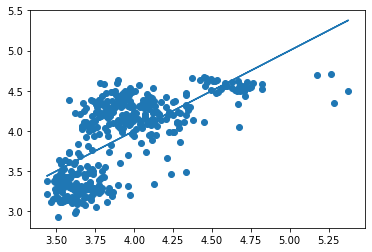

In [220]:
LOGGP16 = -0.946887*df2.uJAVA_J0410+0.503020*df2.J0410_J0861+5.104792
plt.scatter(LOGGP16,df2.LOGG)
b,m = polyfit (LOGGP16,df2.LOGG,1)
np.corrcoef(LOGGP16,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP16,b+m*LOGGP16)
a=np.corrcoef(LOGGP16,df2.LOGG)[0,1]
print(a**2)

In [169]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0410 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.960450
df2.uJAVA_J0410   -0.888342
df2.J0660_J0861    0.397120
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           8.82e-47
Time:                        03:06:16   Log-Likelihood:                -189.68
No. Observations:                 411   AIC:                             385.4
Df Residuals:                     408   BIC:                             397.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -0.25833672264015506 + 1.081359432607361 *x
0.4648259743424142


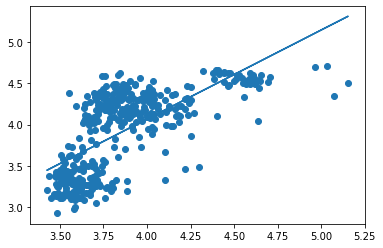

In [221]:
LOGGP17 = -0.888342*df2.uJAVA_J0410+0.397120*df2.J0410_J0861+4.960450
plt.scatter(LOGGP17,df2.LOGG)
b,m = polyfit (LOGGP17,df2.LOGG,1)
np.corrcoef(LOGGP17,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP17,b+m*LOGGP17)
a=np.corrcoef(LOGGP17,df2.LOGG)[0,1]
print(a**2)

In [170]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.uJAVA_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.481832
df2.uJAVA_J0660   -1.296455
df2.uJAVA_J0861    0.783245
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     59.74
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.76e-23
Time:                        03:06:17   Log-Likelihood:                -243.72
No. Observations:                 411   AIC:                             493.4
Df Residuals:                     408   BIC:                             505.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.1398967491397685e-07 + 1.0000000047323694 *x
0.22650835636655542


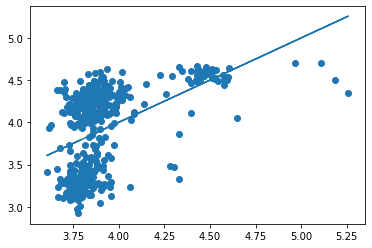

In [222]:
LOGGP18 = -1.296455*df2.uJAVA_J0660+0.783245*df2.uJAVA_J0861+4.481832
plt.scatter(LOGGP18,df2.LOGG)
b,m = polyfit (LOGGP18,df2.LOGG,1)
np.corrcoef(LOGGP18,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP18,b+m*LOGGP18)
a=np.corrcoef(LOGGP18,df2.LOGG)[0,1]
print(a**2)

In [171]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.J0378_J0410", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.147087
df2.uJAVA_J0660   -0.732973
df2.J0378_J0410    0.933998
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     57.65
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           8.87e-23
Time:                        03:06:17   Log-Likelihood:                -245.35
No. Observations:                 411   AIC:                             496.7
Df Residuals:                     408   BIC:                             508.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 8.199561353988535e-07 + 0.9999997018818702 *x
0.22034455797072638


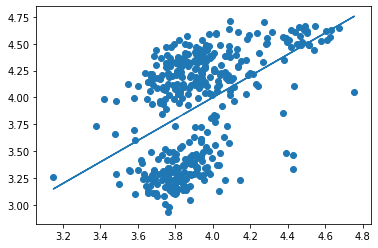

In [223]:
LOGGP19 = -0.732973*df2.uJAVA_J0660+0.933998*df2.J0378_J0410+4.147087
plt.scatter(LOGGP19,df2.LOGG)
b,m = polyfit (LOGGP19,df2.LOGG,1)
np.corrcoef(LOGGP19,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP19,b+m*LOGGP19)
a=np.corrcoef(LOGGP19,df2.LOGG)[0,1]
print(a**2)

In [172]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.J0378_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.730781
df2.uJAVA_J0660   -1.762805
df2.J0378_J0660    2.379205
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     411.9
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.26e-98
Time:                        03:06:18   Log-Likelihood:                -69.425
No. Observations:                 411   AIC:                             144.8
Df Residuals:                     408   BIC:                             156.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 2.5640354358955175e-07 + 0.9999998407033205 *x
0.6687885997224403


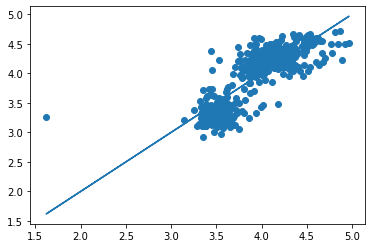

In [224]:
LOGGP20 = -1.762805*df2.uJAVA_J0660+2.379205*df2.J0378_J0660+4.730781
plt.scatter(LOGGP20,df2.LOGG)
b,m = polyfit (LOGGP20,df2.LOGG,1)
np.corrcoef(LOGGP20,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP20,b+m*LOGGP20)
a=np.corrcoef(LOGGP20,df2.LOGG)[0,1]
print(a**2)

In [173]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.J0378_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.680985
df2.uJAVA_J0660   -1.180491
df2.J0378_J0861    1.237474
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           3.42e-62
Time:                        03:06:18   Log-Likelihood:                -153.93
No. Observations:                 411   AIC:                             313.9
Df Residuals:                     408   BIC:                             325.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -3.2715422494094697e-07 + 1.000000010761957 *x
0.5003184152977338


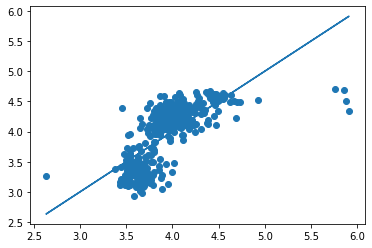

In [225]:
LOGGP21 = -1.180491*df2.uJAVA_J0660+1.237474*df2.J0378_J0861+4.680985
plt.scatter(LOGGP21,df2.LOGG)
b,m = polyfit (LOGGP21,df2.LOGG,1)
np.corrcoef(LOGGP21,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP21,b+m*LOGGP21)
a=np.corrcoef(LOGGP21,df2.LOGG)[0,1]
print(a**2)

In [174]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.185329
df2.uJAVA_J0660   -1.005830
df2.J0410_J0660    1.817794
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.60e-60
Time:                        03:06:19   Log-Likelihood:                -158.29
No. Observations:                 411   AIC:                             322.6
Df Residuals:                     408   BIC:                             334.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 9.45961945551037e-07 + 0.9999998494034896 *x
0.4895918299176096


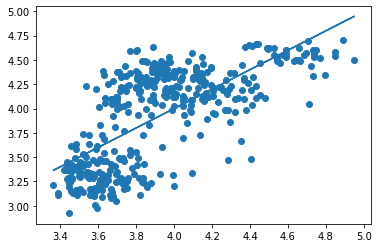

In [226]:
LOGGP22 = -1.005830*df2.uJAVA_J0660+1.817794*df2.J0410_J0660+5.185329
plt.scatter(LOGGP22,df2.LOGG)
b,m = polyfit (LOGGP22,df2.LOGG,1)
np.corrcoef(LOGGP22,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP22,b+m*LOGGP22)
a=np.corrcoef(LOGGP22,df2.LOGG)[0,1]
print(a**2)

In [175]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.921015
df2.uJAVA_J0660   -0.797129
df2.J0410_J0861    0.999621
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     138.3
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.39e-46
Time:                        03:06:19   Log-Likelihood:                -190.13
No. Observations:                 411   AIC:                             386.3
Df Residuals:                     408   BIC:                             398.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -2.4707959872549273e-06 + 1.0000004648851388 *x
0.4040532892863267


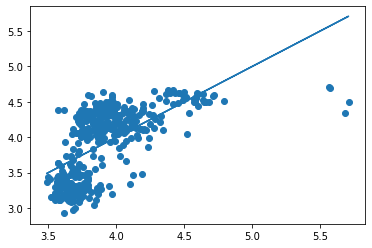

In [227]:
LOGGP23 = -0.797129*df2.uJAVA_J0660+0.999621*df2.J0410_J0861+4.921015
plt.scatter(LOGGP23,df2.LOGG)
b,m = polyfit (LOGGP23,df2.LOGG,1)
np.corrcoef(LOGGP23,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP23,b+m*LOGGP23)
a=np.corrcoef(LOGGP23,df2.LOGG)[0,1]
print(a**2)

In [176]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0660 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.481832
df2.uJAVA_J0660   -0.513210
df2.J0660_J0861    0.783245
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     59.74
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.76e-23
Time:                        03:06:20   Log-Likelihood:                -243.72
No. Observations:                 411   AIC:                             493.4
Df Residuals:                     408   BIC:                             505.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.139896759654315e-07 + 1.0000000047323698 *x
0.22650835636655542


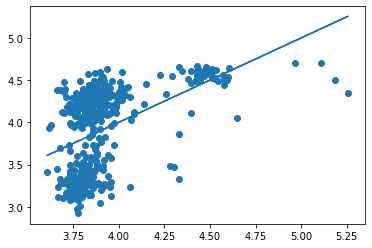

In [228]:
LOGGP24 = -0.513210*df2.uJAVA_J0660+0.783245*df2.J0660_J0861+4.481832
plt.scatter(LOGGP24,df2.LOGG)
b,m = polyfit (LOGGP24,df2.LOGG,1)
np.corrcoef(LOGGP24,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP24,b+m*LOGGP24)
a=np.corrcoef(LOGGP24,df2.LOGG)[0,1]
print(a**2)

In [177]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0861 + df2.J0378_J0410", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.166047
df2.uJAVA_J0861   -0.472919
df2.J0378_J0410    0.366081
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     32.00
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.23e-13
Time:                        03:06:21   Log-Likelihood:                -266.56
No. Observations:                 411   AIC:                             539.1
Df Residuals:                     408   BIC:                             551.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 1.811134443288836e-06 + 0.9999995696822654 *x
0.13558880105638918


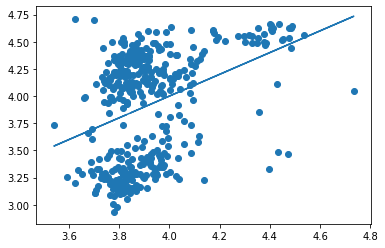

In [229]:
LOGGP25 = -0.472919*df2.uJAVA_J0861+0.366081*df2.J0378_J0410+4.166047
plt.scatter(LOGGP25,df2.LOGG)
b,m = polyfit (LOGGP25,df2.LOGG,1)
np.corrcoef(LOGGP25,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP25,b+m*LOGGP25)
a=np.corrcoef(LOGGP25,df2.LOGG)[0,1]
print(a**2)

In [178]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0861 + df2.J0378_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.479318
df2.uJAVA_J0861   -1.593015
df2.J0378_J0660    2.340188
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           9.13e-69
Time:                        03:06:21   Log-Likelihood:                -138.68
No. Observations:                 411   AIC:                             283.4
Df Residuals:                     408   BIC:                             295.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -2.4093429913535333e-07 + 0.9999999837287668 *x
0.5360478055618669


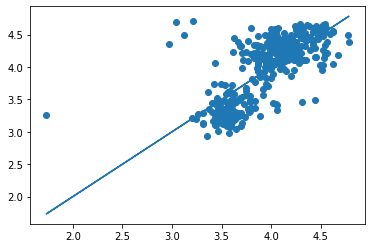

In [231]:
LOGGP26 = -1.593015*df2.uJAVA_J0861+2.340188*df2.J0378_J0660+4.479318
plt.scatter(LOGGP26,df2.LOGG)
b,m = polyfit (LOGGP26,df2.LOGG,1)
np.corrcoef(LOGGP26,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP26,b+m*LOGGP26)
a=np.corrcoef(LOGGP26,df2.LOGG)[0,1]
print(a**2)

In [179]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0861 + df2.J0378_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.766687
df2.uJAVA_J0861   -1.647945
df2.J0378_J0861    2.066860
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     367.2
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           6.02e-92
Time:                        03:06:22   Log-Likelihood:                -84.914
No. Observations:                 411   AIC:                             175.8
Df Residuals:                     408   BIC:                             187.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.4974625405087387e-06 + 1.0000002462334032 *x
0.6428586922081148


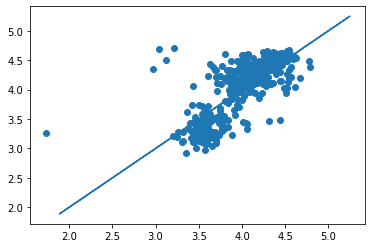

In [232]:
LOGGP27 = -1.647945*df2.uJAVA_J0861+2.066860*df2.J0378_J0861+4.766687
plt.scatter(LOGGP26,df2.LOGG)
b,m = polyfit (LOGGP27,df2.LOGG,1)
np.corrcoef(LOGGP27,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP27,b+m*LOGGP27)
a=np.corrcoef(LOGGP27,df2.LOGG)[0,1]
print(a**2)

In [180]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0861 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.106816
df2.uJAVA_J0861   -0.963078
df2.J0410_J0660    1.979952
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.14e-52
Time:                        03:06:22   Log-Likelihood:                -176.65
No. Observations:                 411   AIC:                             359.3
Df Residuals:                     408   BIC:                             371.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -2.5727513641030075e-08 + 1.0000000659616828 *x
0.44189018469506525


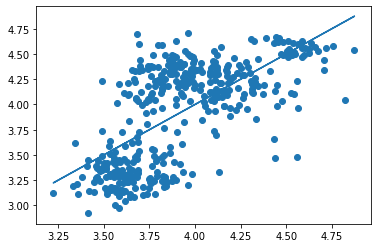

In [234]:
LOGGP28 = -0.963078*df2.uJAVA_J0861+1.979952*df2.J0410_J0660+5.106816
plt.scatter(LOGGP28,df2.LOGG)
b,m = polyfit (LOGGP28,df2.LOGG,1)
np.corrcoef(LOGGP28,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP28,b+m*LOGGP28)
a=np.corrcoef(LOGGP28,df2.LOGG)[0,1]
print(a**2)

In [181]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0861 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          5.104792
df2.uJAVA_J0861   -0.946887
df2.J0410_J0861    1.449907
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.13e-56
Time:                        03:06:23   Log-Likelihood:                -167.37
No. Observations:                 411   AIC:                             340.7
Df Residuals:                     408   BIC:                             352.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= 2.7295941385575476e-07 + 0.999999869133237 *x
0.46654468584091385


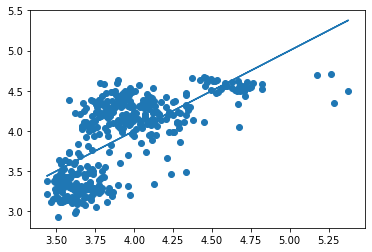

In [235]:
LOGGP29 = -0.946887*df2.uJAVA_J0861+1.449907*df2.J0410_J0861+5.104792
plt.scatter(LOGGP29,df2.LOGG)
b,m = polyfit (LOGGP29,df2.LOGG,1)
np.corrcoef(LOGGP29,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP29,b+m*LOGGP29)
a=np.corrcoef(LOGGP29,df2.LOGG)[0,1]
print(a**2)

In [182]:
result = sm.ols(formula="df2.LOGG ~ df2.uJAVA_J0861 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.481832
df2.uJAVA_J0861   -0.513210
df2.J0660_J0861    1.296455
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     59.74
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.76e-23
Time:                        03:06:23   Log-Likelihood:                -243.72
No. Observations:                 411   AIC:                             493.4
Df Residuals:                     408   BIC:                             505.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.1398967491397685e-07 + 1.0000000047323692 *x
0.22650835636655547


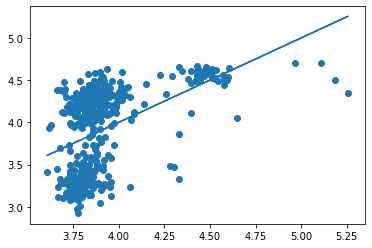

In [236]:
LOGGP30 = -0.513210*df2.uJAVA_J0861+1.296455*df2.J0660_J0861+4.481832
plt.scatter(LOGGP30,df2.LOGG)
b,m = polyfit (LOGGP30,df2.LOGG,1)
np.corrcoef(LOGGP30,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP30,b+m*LOGGP30)
a=np.corrcoef(LOGGP30,df2.LOGG)[0,1]
print(a**2)

In [183]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0410 + df2.J0378_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.484277
df2.J0378_J0410   -1.476811
df2.J0378_J0660    0.589784
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.78
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           6.34e-09
Time:                        03:06:24   Log-Likelihood:                -277.49
No. Observations:                 411   AIC:                             561.0
Df Residuals:                     408   BIC:                             573.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

y= -1.654376513514193e-06 + 1.000000281485661 *x
0.08837943393208914


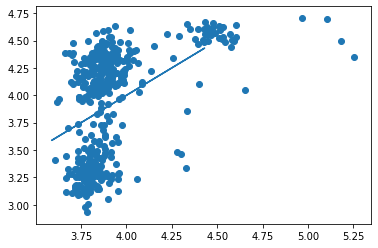

In [237]:
LOGGP31 = -1.476811*df2.J0378_J0410+0.589784*df2.J0378_J0660+4.484277
plt.scatter(LOGGP30,df2.LOGG)
b,m = polyfit (LOGGP31,df2.LOGG,1)
np.corrcoef(LOGGP31,df2.LOGG)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(LOGGP31,b+m*LOGGP31)
a=np.corrcoef(LOGGP31,df2.LOGG)[0,1]
print(a**2)

In [184]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0410 + df2.J0378_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.471199
df2.J0378_J0410   -1.305731
df2.J0378_J0861    0.460663
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     22.13
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           7.48e-10
Time:                        03:06:24   Log-Likelihood:                -275.33
No. Observations:                 411   AIC:                             556.7
Df Residuals:                     408   BIC:                             568.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [185]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0410 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.484277
df2.J0378_J0410   -0.887028
df2.J0410_J0660    0.589784
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.78
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           6.34e-09
Time:                        03:06:25   Log-Likelihood:                -277.49
No. Observations:                 411   AIC:                             561.0
Df Residuals:                     408   BIC:                             573.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [186]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0410 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.471199
df2.J0378_J0410   -0.845068
df2.J0410_J0861    0.460663
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     22.13
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           7.48e-10
Time:                        03:06:25   Log-Likelihood:                -275.33
No. Observations:                 411   AIC:                             556.7
Df Residuals:                     408   BIC:                             568.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [187]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0410 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.331149
df2.J0378_J0410   -0.683416
df2.J0660_J0861    0.671214
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     15.15
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           4.52e-07
Time:                        03:06:26   Log-Likelihood:                -281.79
No. Observations:                 411   AIC:                             569.6
Df Residuals:                     408   BIC:                             581.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [188]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0660 + df2.J0378_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          3.991019
df2.J0378_J0660   -0.777220
df2.J0378_J0861    0.703668
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.355
Date:                Wed, 20 Nov 2019   Prob (F-statistic):            0.00191
Time:                        03:06:26   Log-Likelihood:                -290.20
No. Observations:                 411   AIC:                             586.4
Df Residuals:                     408   BIC:                             598.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [189]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0660 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.484277
df2.J0378_J0660   -0.887028
df2.J0410_J0660    1.476811
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.78
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           6.34e-09
Time:                        03:06:27   Log-Likelihood:                -277.49
No. Observations:                 411   AIC:                             561.0
Df Residuals:                     408   BIC:                             573.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [190]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0660 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.311684
df2.J0378_J0660   -0.573349
df2.J0410_J0861    0.803337
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     18.35
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.33e-08
Time:                        03:06:28   Log-Likelihood:                -278.80
No. Observations:                 411   AIC:                             563.6
Df Residuals:                     408   BIC:                             575.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [191]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0660 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          3.991019
df2.J0378_J0660   -0.073552
df2.J0660_J0861    0.703668
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.355
Date:                Wed, 20 Nov 2019   Prob (F-statistic):            0.00191
Time:                        03:06:28   Log-Likelihood:                -290.20
No. Observations:                 411   AIC:                             586.4
Df Residuals:                     408   BIC:                             598.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [192]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0861 + df2.J0410_J0660", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.160422
df2.J0378_J0861   -0.338118
df2.J0410_J0660    0.894036
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.384
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000270
Time:                        03:06:29   Log-Likelihood:                -288.23
No. Observations:                 411   AIC:                             582.5
Df Residuals:                     408   BIC:                             594.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [193]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0861 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          4.471199
df2.J0378_J0861   -0.845068
df2.J0410_J0861    1.305731
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     22.13
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           7.48e-10
Time:                        03:06:29   Log-Likelihood:                -275.33
No. Observations:                 411   AIC:                             556.7
Df Residuals:                     408   BIC:                             568.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [194]:
result = sm.ols(formula="df2.LOGG ~ df2.J0378_J0861 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          3.991019
df2.J0378_J0861   -0.073552
df2.J0660_J0861    0.777220
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.355
Date:                Wed, 20 Nov 2019   Prob (F-statistic):            0.00191
Time:                        03:06:30   Log-Likelihood:                -290.20
No. Observations:                 411   AIC:                             586.4
Df Residuals:                     408   BIC:                             598.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [195]:
result = sm.ols(formula="df2.LOGG ~ df2.J0410_J0660 + df2.J0410_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          3.990631
df2.J0410_J0660   -0.216031
df2.J0410_J0861    0.508003
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.493
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000243
Time:                        03:06:31   Log-Likelihood:                -288.12
No. Observations:                 411   AIC:                             582.2
Df Residuals:                     408   BIC:                             594.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [196]:
result = sm.ols(formula="df2.LOGG ~ df2.J0410_J0660 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          3.990631
df2.J0410_J0660    0.291972
df2.J0660_J0861    0.508003
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.493
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000243
Time:                        03:06:31   Log-Likelihood:                -288.12
No. Observations:                 411   AIC:                             582.2
Df Residuals:                     408   BIC:                             594.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [197]:
result = sm.ols(formula="df2.LOGG ~ df2.J0410_J0861 + df2.J0660_J0861", data=df2).fit()
print(result.params)
print(result.summary())

Intercept          3.990631
df2.J0410_J0861    0.291972
df2.J0660_J0861    0.216031
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               df2.LOGG   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     8.493
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000243
Time:                        03:06:32   Log-Likelihood:                -288.12
No. Observations:                 411   AIC:                             582.2
Df Residuals:                     408   BIC:                             594.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------